<a href="https://colab.research.google.com/github/simonepascucci/progettoLAB-IA/blob/main/OCR_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install --ignore-installed Pillow==9.0.0

In [1]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import easyocr
import pytesseract
import imutils
reader = easyocr.Reader(['it'])


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [2]:
def display(img, title):
  print(title)
  print()
  cv2_imshow(img)

0 - Input plate:



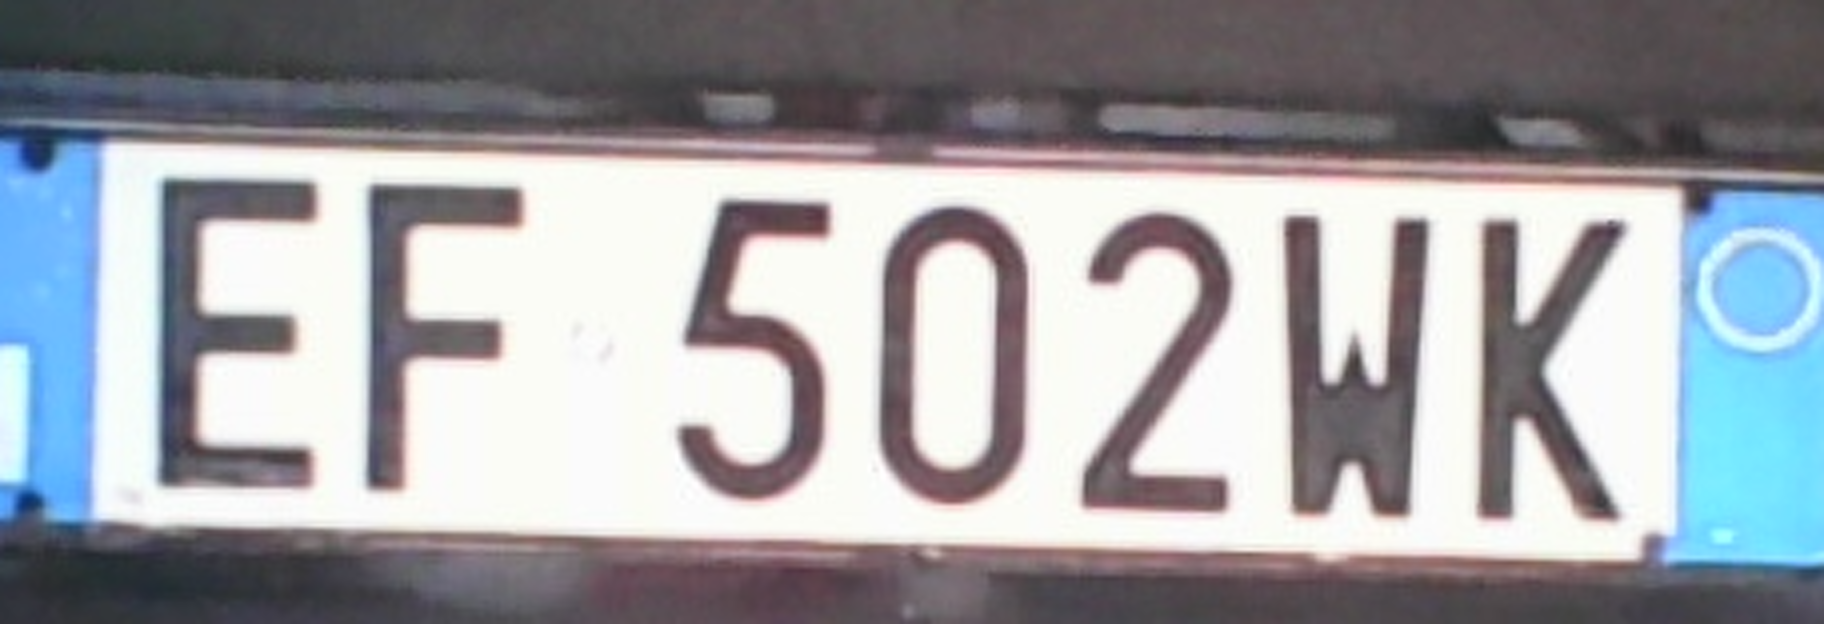

In [3]:
plate_PATH = '/content/license_plate_1.png'
p = cv2.imread(plate_PATH)
from scipy.ndimage import interpolation
plate = cv2.resize(p, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
h = plate.shape[0]
w = plate.shape[1]
h1 = int(0.05 * h)
w1 = int(0.05 * w)
display(plate, '0 - Input plate:')

Vertically cropped plate: (for plate with extra border)



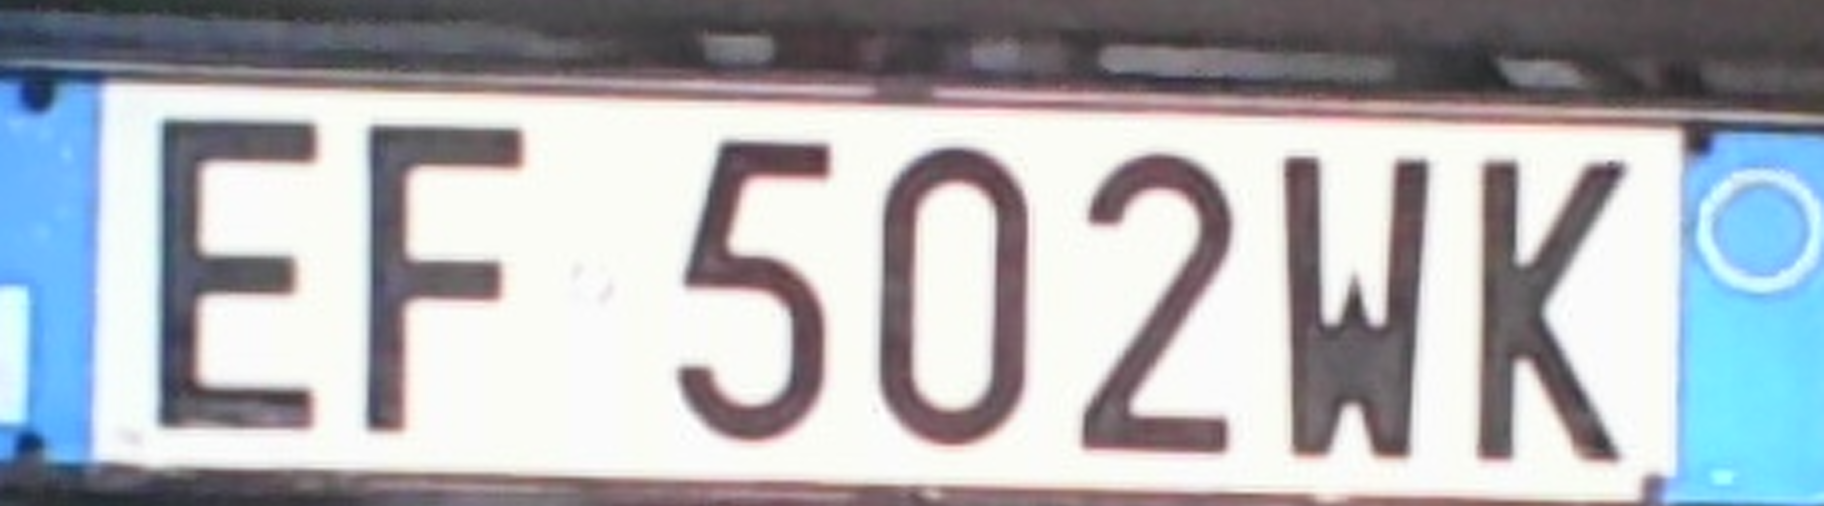

In [5]:
h = plate.shape[0]
w = plate.shape[1]
h1 = int(0.05 * h)
w1 = int(0.05 * w)
plate = plate[h1 : h-h1, 0:w]
display(plate, 'Vertically cropped plate: (for plate with extra border)')

Horizontally cropped plate: (for plate with extra border)



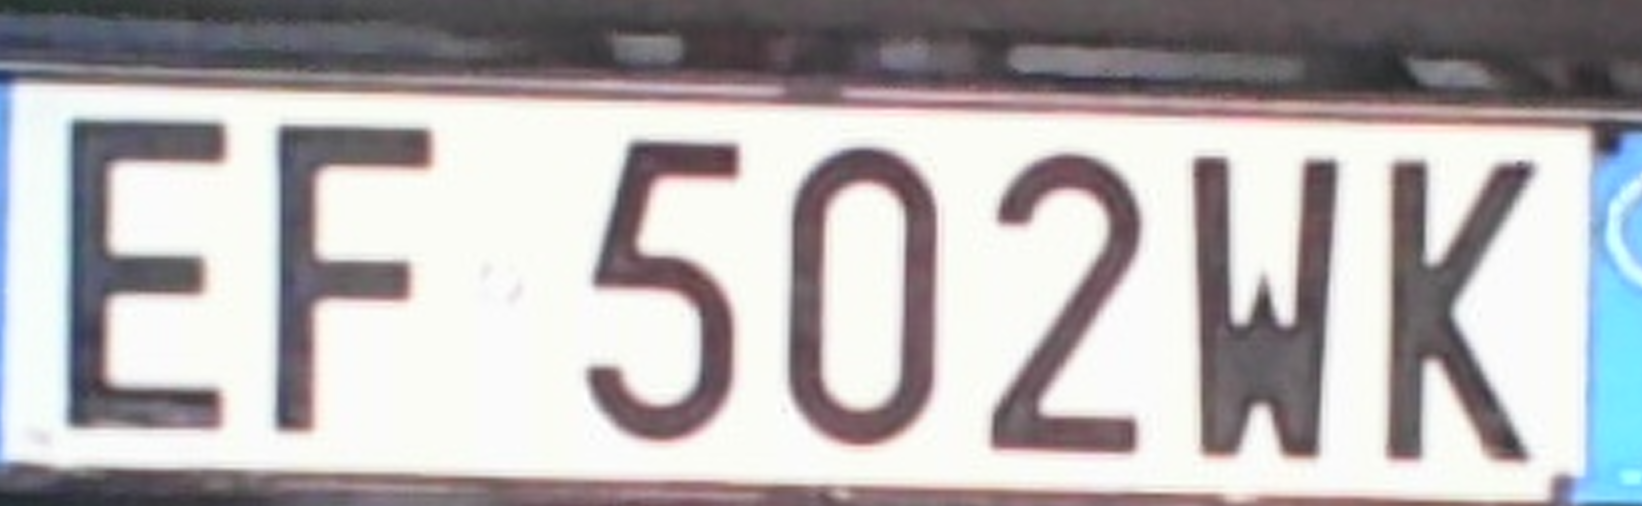

In [6]:
h = plate.shape[0]
w = plate.shape[1]
h1 = int(0.05 * h)
w1 = int(0.05 * w)
plate = plate[0 : h ,w1 : w-w1]
display(plate, 'Horizontally cropped plate: (for plate with extra border)')

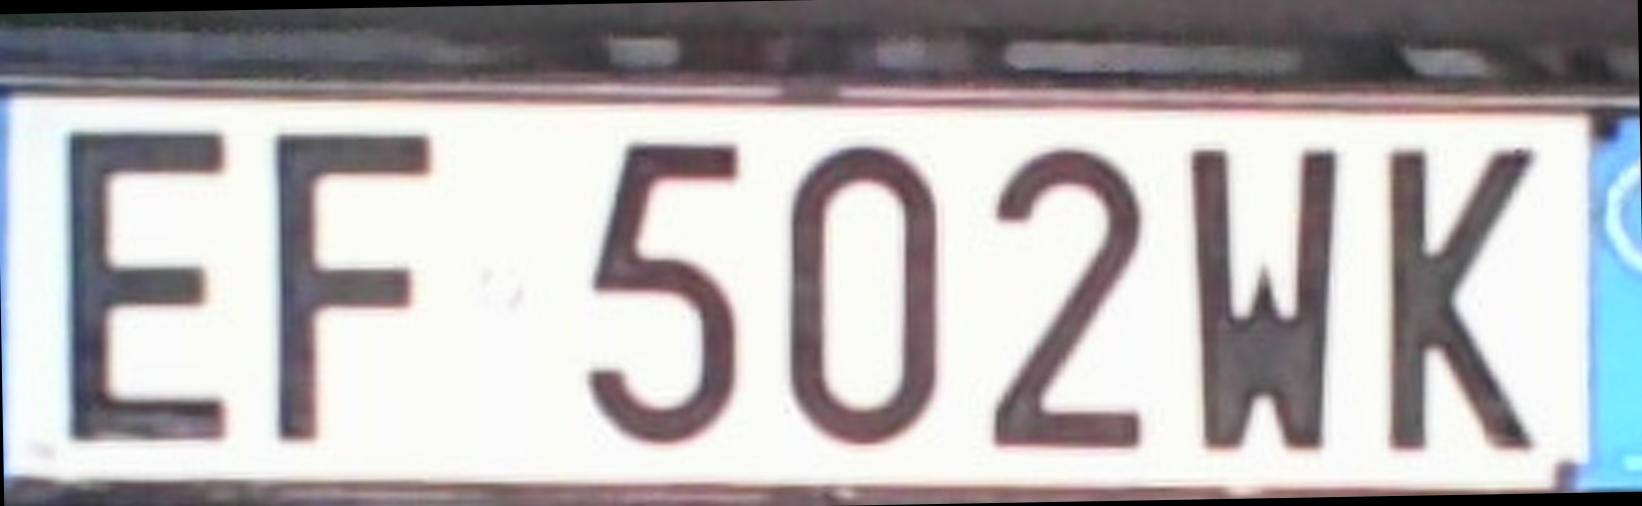

In [10]:
plane = imutils.rotate(plate,1)
display(plane, '')

1 - Gaussian blur on grayscale plate: 



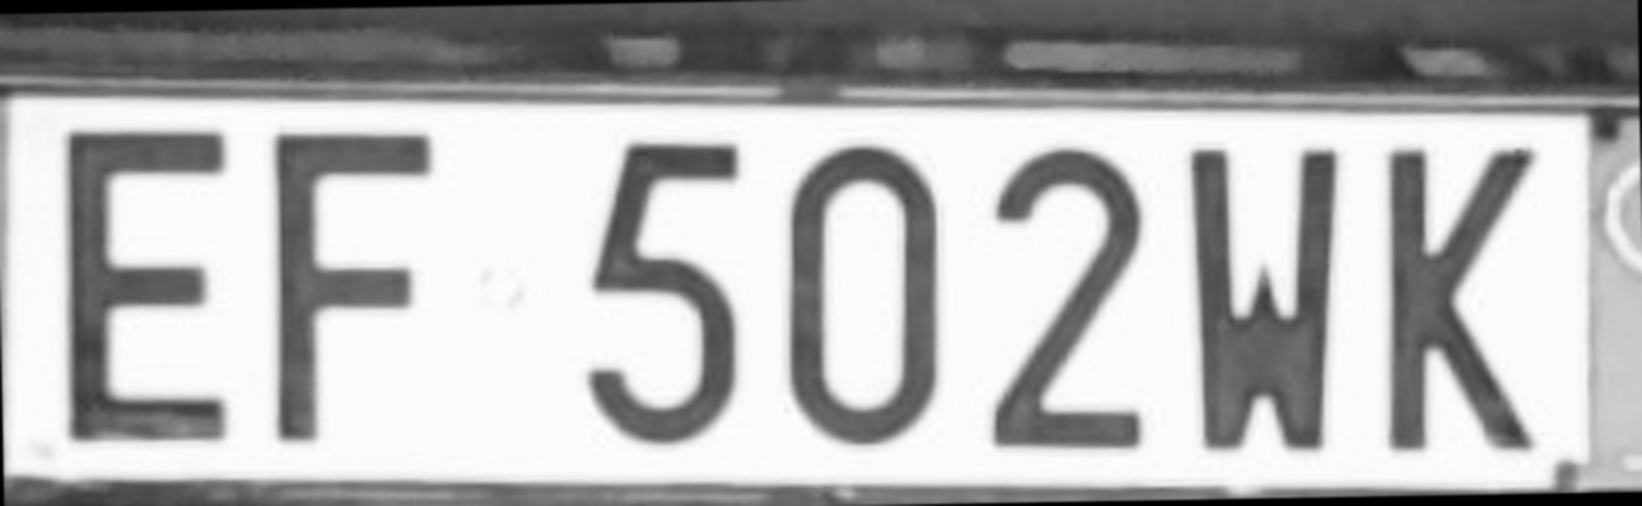

1 - Bilateral filter blur on grayscale plate: 



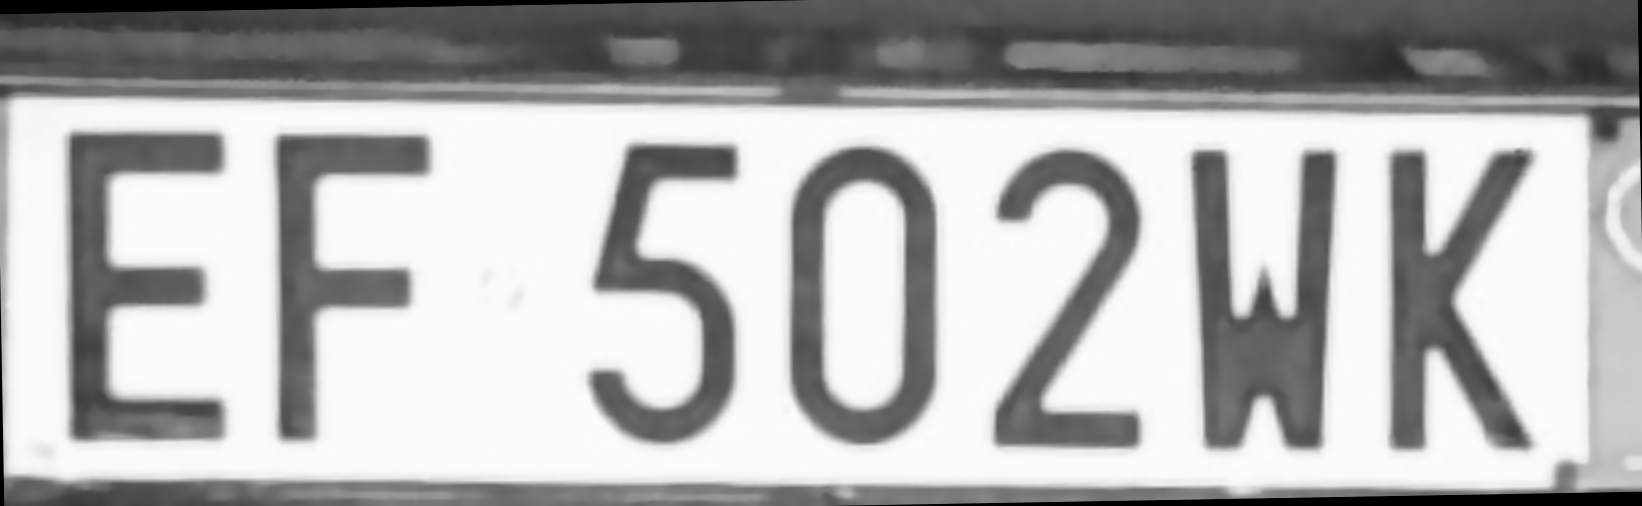

In [11]:
gray = cv2.cvtColor(plane, cv2.COLOR_BGR2GRAY)
#gray = cv2.bitwise_not(gray)
gblur = cv2.GaussianBlur(gray, (5, 5), 0)
bfilter = cv2.bilateralFilter(gray, 11, 10, 10)
display(gblur, '1 - Gaussian blur on grayscale plate: ')
display(bfilter, '1 - Bilateral filter blur on grayscale plate: ')

2 - Binarization with OTSU thresholding method (For white plates)



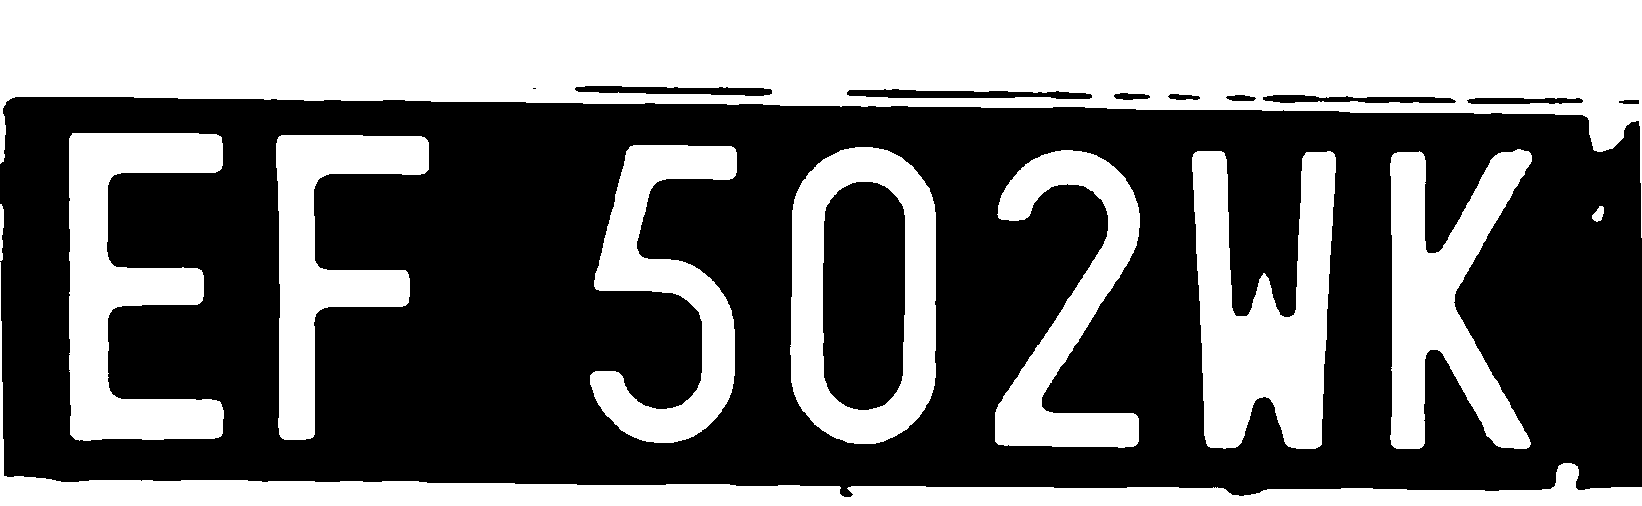

3 - Dilation (for plates with thin characters)



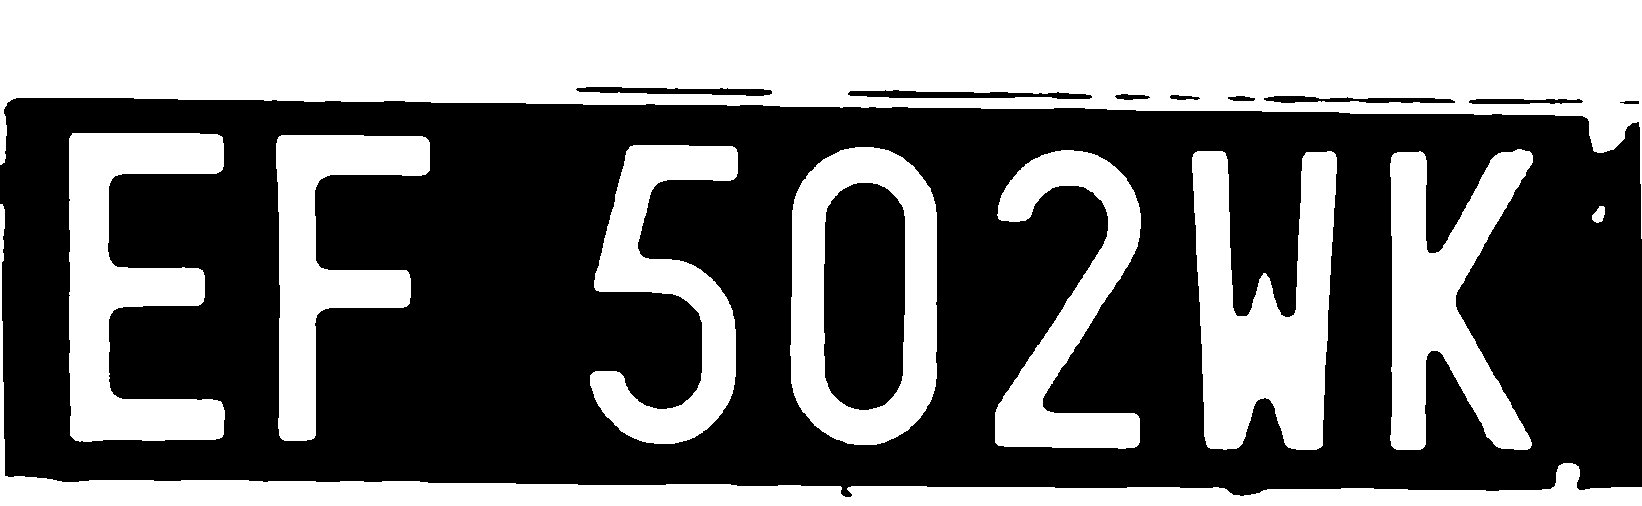

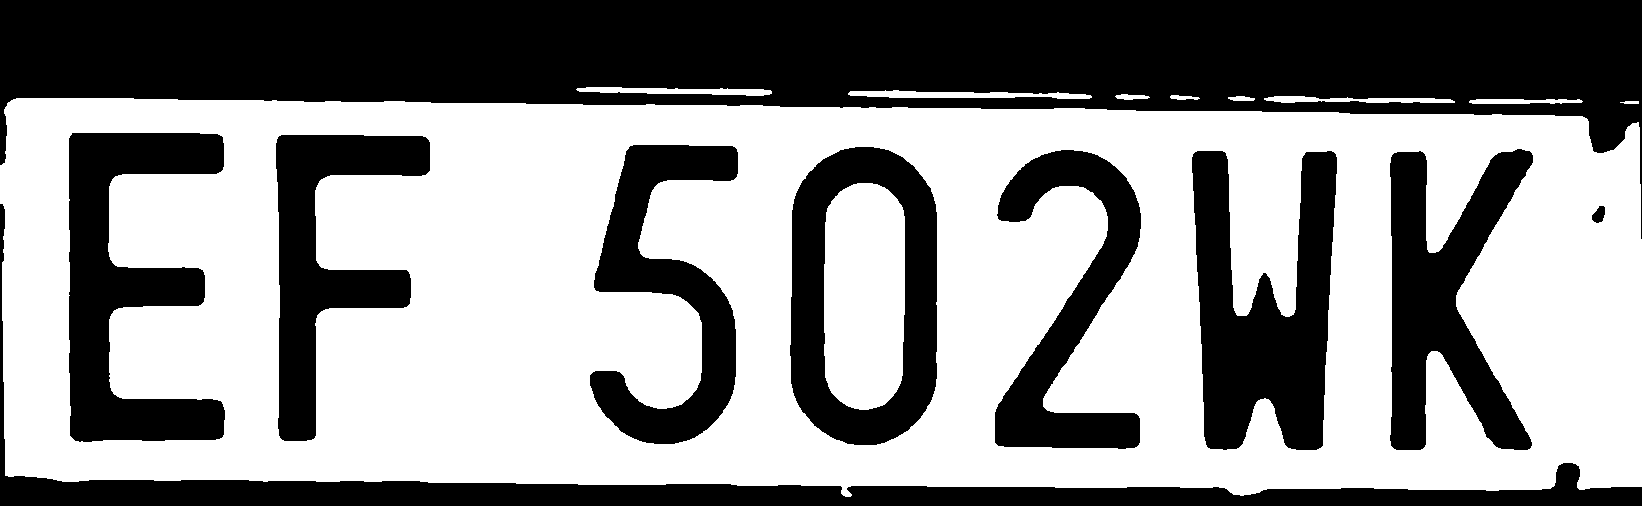

3 - Erosion (for plates with thick characters)



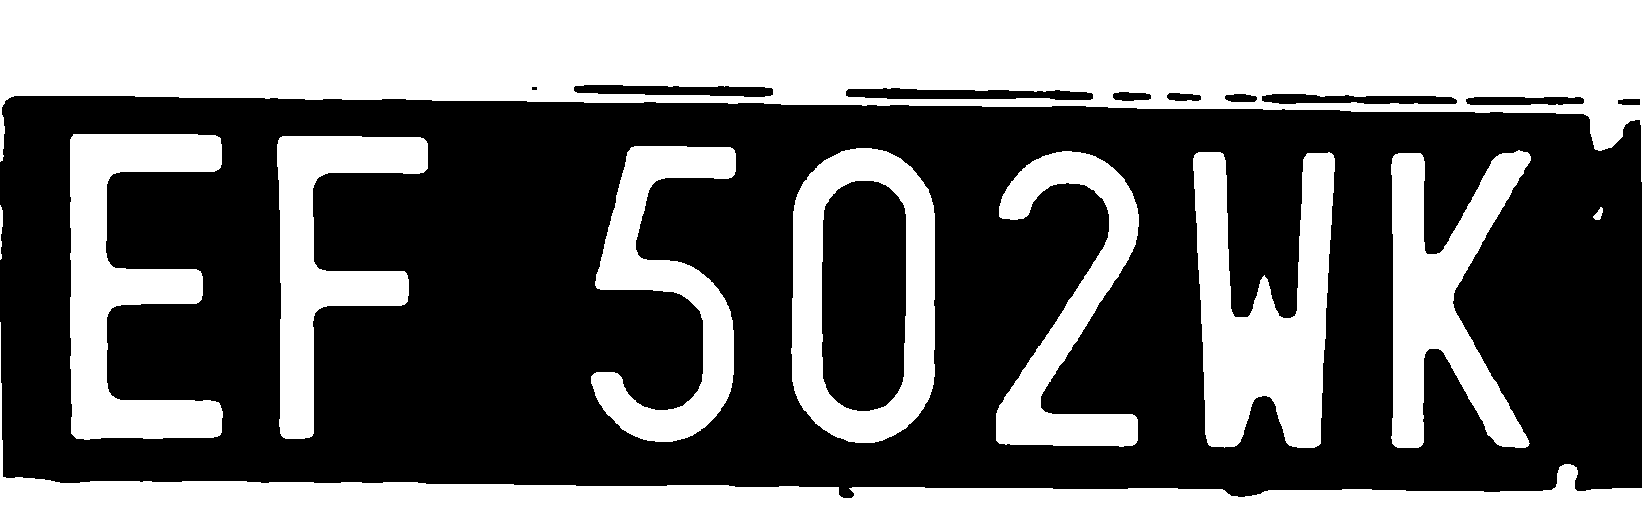

In [12]:
ret, thresh = cv2.threshold(bfilter, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
display(thresh, '2 - Binarization with OTSU thresholding method (For white plates)')
rect_kern = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
dilation = cv2.dilate(thresh, rect_kern, iterations = 1)
display(dilation, '3 - Dilation (for plates with thin characters)')
display(cv2.bitwise_not(dilation), '')
rect_kern = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
erosion = cv2.erode(thresh, rect_kern, iterations = 1)
display(erosion, '3 - Erosion (for plates with thick characters)')

In [14]:
res1 = reader.readtext(dilation)
res2 = reader.readtext(cv2.bitwise_not(dilation))
res3 = reader.readtext(cv2.bitwise_not(erosion))
res4 = reader.readtext(gray)
print()
t = ''
print('res1: ')
for i in range(len(res1)):
  print(res1[i])

print('res2: ')
for i in range(len(res2)):
  if i >= 3:
    break
  print(res2[i])
  t += res2[i][-2]

print('res3: ')
for i in range(len(res3)):
  print(res3[i])

print()
t2 = ''
for i in range(len(res4)):
  t2 += res4[i][-2]
final = ''
for c in t2:
  if c.isalnum():
    final += c
print('Easy-OCR on grayscale plate: ',final.upper().strip())
final = ''
for c in t:
  if c.isalnum():
    final += c
print('Easy-OCR after thresholding plate: ', final.upper().strip())
t = pytesseract.image_to_string(gray)
final = ''
for c in t:
  if c.isalnum():
    final += c
print('Pytesseract OCR on grayscale plate: ', final.upper().strip())
t = pytesseract.image_to_string(dilation)
final = ''
for c in t:
  if c.isalnum():
    final += c
print('Pytesseract OCR after thresholding plate: ', final.upper().strip())


res1: 
([[0, 113], [1571, 113], [1571, 466], [0, 466]], 'EF 502HK', 0.9200570848963722)
res2: 
([[0, 114], [1629, 114], [1629, 480], [0, 480]], 'EF 502WK:', 0.6832583651268782)
res3: 
([[0, 112], [1623, 112], [1623, 478], [0, 478]], 'EF 502WK', 0.8524751445027757)

Easy-OCR on grayscale plate:  EF502WK
Easy-OCR after thresholding plate:  EF502WK
Pytesseract OCR on grayscale plate:  
Pytesseract OCR after thresholding plate:  EFSO2WK
